In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Legends

References

- https://matplotlib.org/3.1.0/tutorials/intermediate/legend_guide.html#sphx-glr-tutorials-intermediate-legend-guide-py

A very good guide to the way matplotlib legends are handled can be found in this [stackoverflow answer](https://stackoverflow.com/a/43439132)

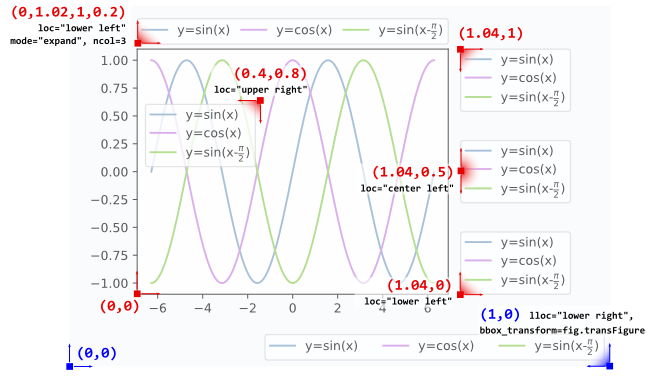

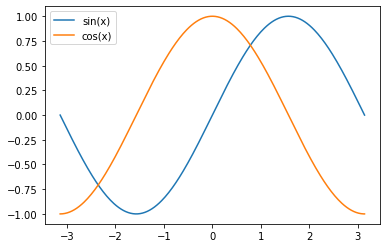

In [2]:
# Default label position (matplotlib chooses best position)

n = 256
x = np.linspace(-np.pi, np.pi, n)
sin = np.sin(x)
cos = np.cos(x)

fig, ax = plt.subplots()
ax.plot(x, sin, label="sin(x)")
ax.plot(x, cos, label="cos(x)")
ax.legend()
plt.show()

You can, however, also specify a position with the `loc` keyword

    'best'            0
    'upper right'     1
    'upper left'      2
    'lower left'      3
    'lower right'     4
    'right'           5
    'center left'     6
    'center right'    7
    'lower center'    8
    'upper center'    9
    'center'          10

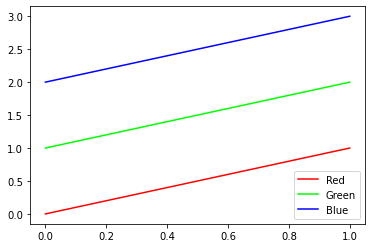

In [3]:
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], color=(1, 0, 0), label="Red")
ax.plot([0, 1], [1, 2], color=(0, 1, 0), label="Green")
ax.plot([0, 1], [2, 3], color=(0, 0, 1), label="Blue")
ax.legend(loc="lower right")
plt.show()

* Or, my usual favorite, place it outside the axis

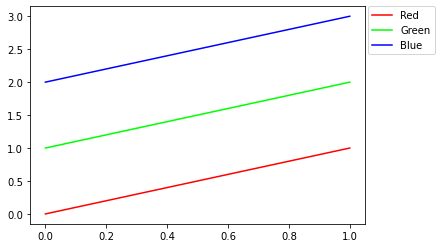

In [4]:
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], color=(1, 0, 0), label="Red")
ax.plot([0, 1], [1, 2], color=(0, 1, 0), label="Green")
ax.plot([0, 1], [2, 3], color=(0, 0, 1), label="Blue")
ax.legend(
    loc="upper left",
    bbox_to_anchor=(1.01, 1),  # Moves the axis the the position 1.01, 1
    borderaxespad=0,  # Removes the padding between the ax and the legend
)
plt.show()

## Horizontal legend

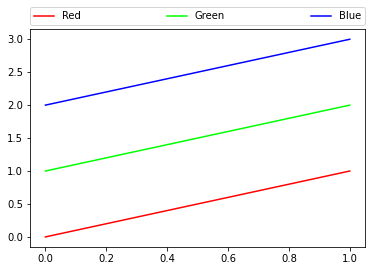

In [5]:
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], color=(1, 0, 0), label="Red")
ax.plot([0, 1], [1, 2], color=(0, 1, 0), label="Green")
ax.plot([0, 1], [2, 3], color=(0, 0, 1), label="Blue")
ax.legend(
    bbox_to_anchor=(0, 1.02, 1, 0.102),
    loc=3,
    ncol=3,
    mode="expand",
    borderaxespad=0,
)
plt.show()

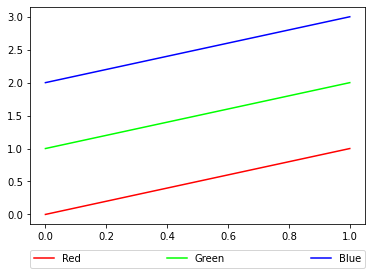

In [6]:
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], color=(1, 0, 0), label="Red")
ax.plot([0, 1], [1, 2], color=(0, 1, 0), label="Green")
ax.plot([0, 1], [2, 3], color=(0, 0, 1), label="Blue")
ax.legend(
    bbox_to_anchor=(0, -0.2, 1, 0.08),  # (x0, y0, width, height)
    loc=3,
    ncol=3,
    mode="expand",
    borderaxespad=0,
)
plt.show()

## Manual legend labels

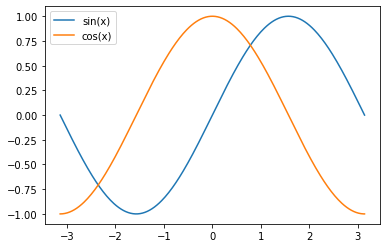

In [7]:
# If you e.g. did not split your y-array before plotting
# you can give the labels to ax.legend as an iterable

n = 256
x = np.linspace(-np.pi, np.pi, n)
y = np.array([np.sin(x), np.cos(x)]).T

fig, ax = plt.subplots()
ax.plot(x, y)
ax.legend(("sin(x)", "cos(x)"))
plt.show()

## Legends for multiple plots

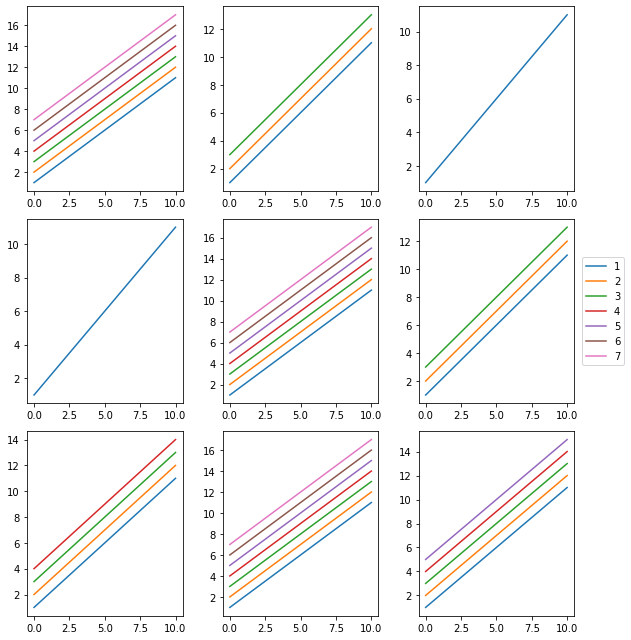

In [8]:
# Hack 1

fig, axs = plt.subplots(3, 3, figsize=(9, 9))
n_lines = np.random.randint(1, 8, 9)

x = np.linspace(0, 10, 10)
fig_handles = ([], [])

for ax, count in zip(axs.ravel(), n_lines):
    for i in range(1, count + 1):
        ax.plot(x, x + i, label=f"{i}")
    ax_handles = ax.get_legend_handles_labels()
    if len(ax_handles[0]) > len(fig_handles[0]):
        fig_handles = ax_handles

axs[1, 2].legend(
    handles=fig_handles[0],
    labels=fig_handles[1],
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    borderaxespad=0,
)
fig.tight_layout()
plt.show()

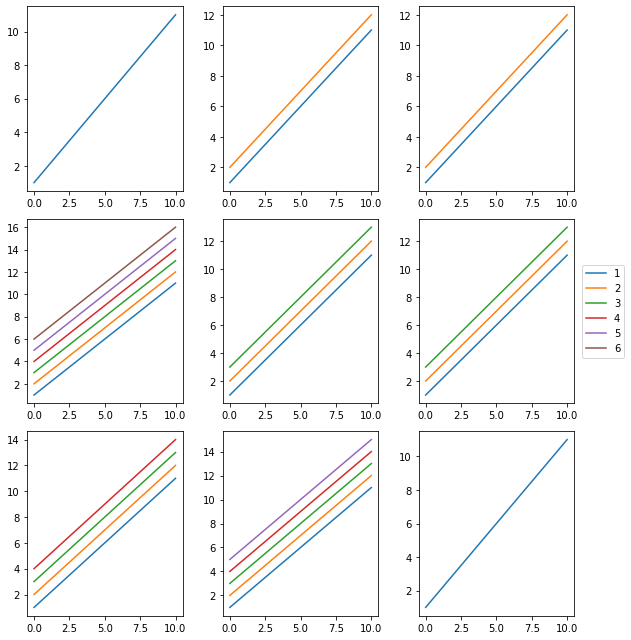

In [9]:
# Hack 2

fig, axs = plt.subplots(3, 3, figsize=(9, 9))
n_lines = np.random.randint(1, 8, 9)

x = np.linspace(0, 10, 10)
label_to_handle = {}

for ax, count in zip(axs.ravel(), n_lines):
    for i in range(1, count + 1):
        ax.plot(x, x + i, label=f"{i}")
    ax_handles_and_labels = ax.get_legend_handles_labels()
    for handle, label in zip(*ax_handles_and_labels):
        label_to_handle[label] = handle

axs[1, 2].legend(
    handles=label_to_handle.values(),
    labels=label_to_handle.keys(),
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    borderaxespad=0,
)
fig.tight_layout()
plt.show()

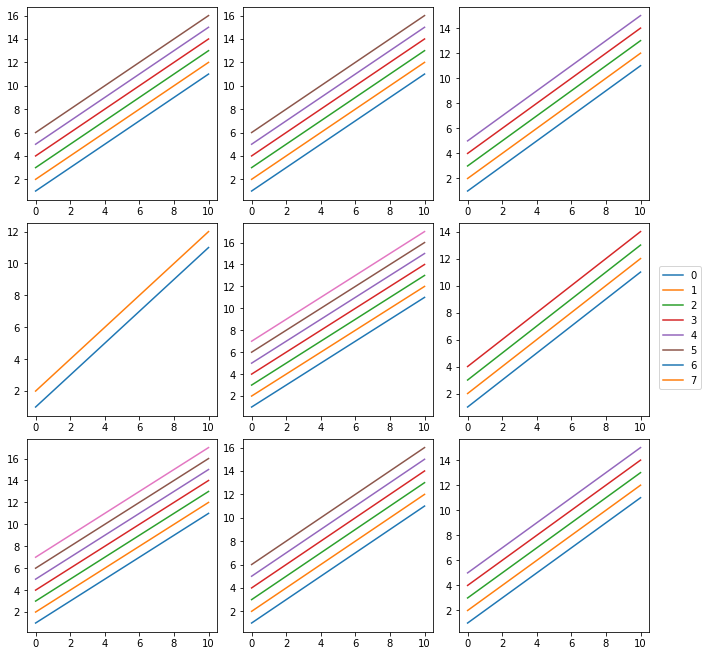

In [10]:
# Hack 3

fig, axs = plt.subplots(3, 3, figsize=(9, 9), constrained_layout=True)
n_lines = np.random.randint(1, 8, 9)

x = np.linspace(0, 10, 10)

for ax, count in zip(axs.ravel(), n_lines):
    for i in range(1, count + 1):
        ax.plot(x, x + i)

fig.legend(range(8), loc="center left", bbox_to_anchor=(1.01, 0.5), borderaxespad=0)
plt.show()

## Axis Labels

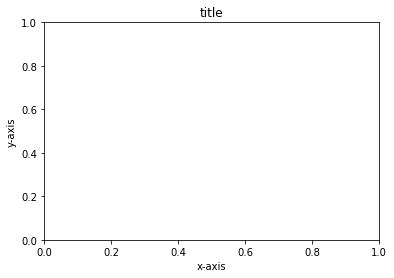

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_title("title")
plt.show()

### Label positioning

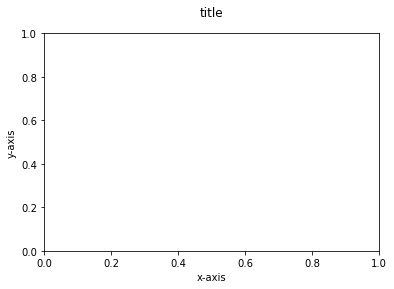

In [12]:
fig, ax = plt.subplots()
ax.set_xlabel("x-axis", x=0.5)
ax.set_ylabel("y-axis", y=0.5)
ax.set_title("title", y=1.05)
plt.show()

### Limits

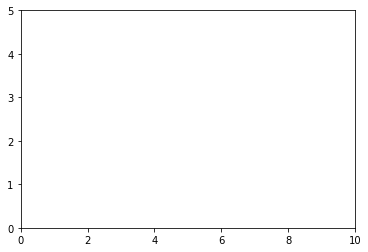

In [13]:
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 5)
plt.show()

### Scaling

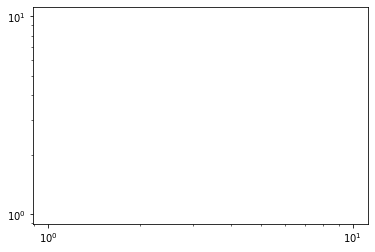

In [14]:
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("log")
plt.show()

### Custom ticks

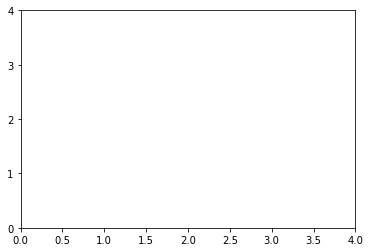

In [15]:
fig, ax = plt.subplots()
ax.xaxis.set_ticks([0, 1, 2, 3, 4], minor=True)
ax.yaxis.set_ticks([0, 1, 2, 3, 4], minor=False)
plt.show()

# Tick formatting

## Hiding Ticks or Labels

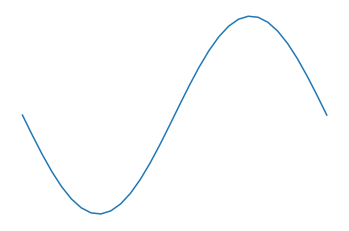

In [16]:
n = 32
x = np.linspace(-np.pi, np.pi, n)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.axis("off")
plt.show()

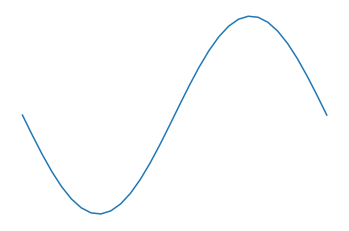

In [17]:
n = 32
x = np.linspace(-np.pi, np.pi, n)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_axis_off()
plt.show()

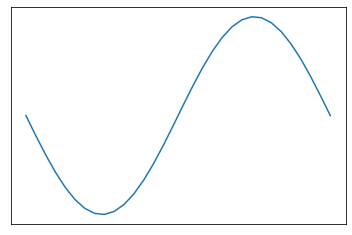

In [18]:
n = 32
x = np.linspace(-np.pi, np.pi, n)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

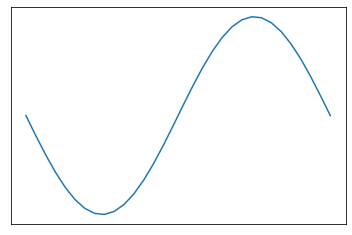

In [19]:
n = 32
x = np.linspace(-np.pi, np.pi, n)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.xaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_formatter(plt.NullFormatter())
plt.show()

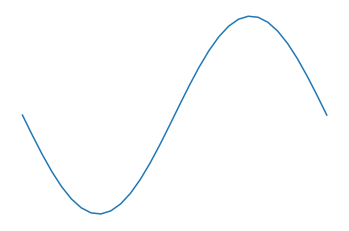

In [20]:
n = 32
x = np.linspace(-np.pi, np.pi, n)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.axis("off")
plt.show()

## Custom ticklabels

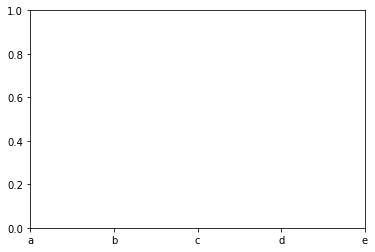

In [21]:
fig, ax = plt.subplots()
ax.xaxis.set_ticks([0, 1, 2, 3, 4])
ax.xaxis.set_ticklabels(["a", "b", "c", "d", "e"])
plt.show()

## Reducing or increasing the number of ticks

* `MaxNLocator`: Choose no more than N good tick locations

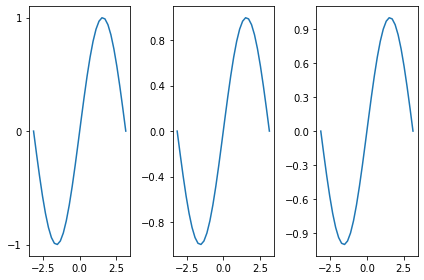

In [22]:
n = 32
x = np.linspace(-np.pi, np.pi, n)
y = np.sin(x)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(x, y)
ax1.yaxis.set_major_locator(plt.MaxNLocator(2))

ax2.plot(x, y)
ax2.yaxis.set_major_locator(plt.MaxNLocator(6))

ax3.plot(x, y)
ax3.yaxis.set_major_locator(plt.MaxNLocator(8))

fig.tight_layout()
plt.show()

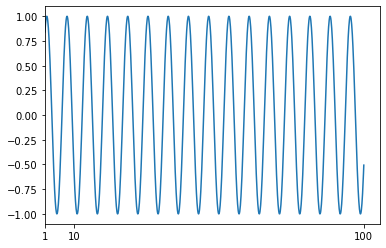

In [23]:
n = 1024
x = np.linspace(1, 100, n)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.xaxis.set_major_locator(plt.LogLocator())
ax.xaxis.set_major_formatter(plt.LogFormatter())
plt.show()

## Locators

In [24]:
import matplotlib.ticker as ticker

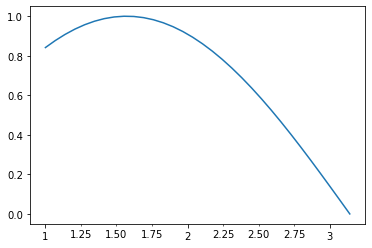

In [25]:
n = 32
x = np.linspace(1, np.pi, n)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.LogFormatter())
ax.xaxis.set_minor_formatter(ticker.ScalarFormatter())

plt.show()

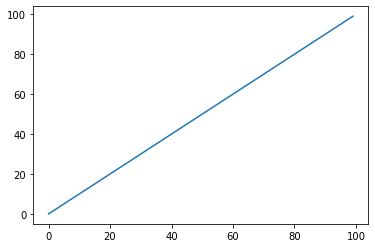

In [26]:
# Linear data range
fig, ax = plt.subplots()
ax.plot(range(100))

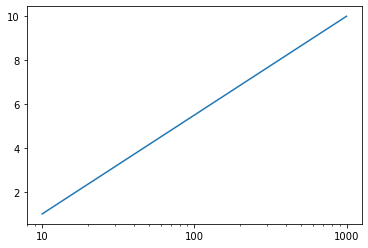

In [27]:
# Logarithmic data range

x = np.logspace(1, 3, 10)
y = np.linspace(1, 10, 10)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xscale("log")
ax.xaxis.set_major_locator(ticker.LogLocator())
ax.xaxis.set_major_formatter(ticker.LogFormatter())
# ax.xaxis.set_minor_locator(ticker.LogLocator())
# ax.xaxis.set_minor_formatter(ticker.LogFormatter())

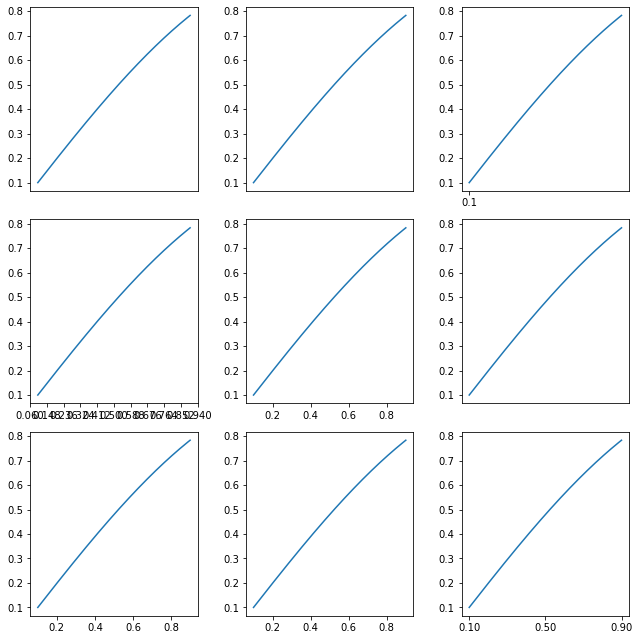

In [28]:
n = 1024
x = np.linspace(0.1, 0.9, n)
y = np.sin(x)

fig, axs = plt.subplots(3, 3, figsize=(9, 9))
axs = axs.flatten()

for ax in axs:
    ax.plot(x, y)

axs[0].xaxis.set_major_locator(ticker.NullLocator())
axs[1].xaxis.set_major_locator(ticker.FixedLocator([1, 50, 100]))
axs[2].xaxis.set_major_locator(ticker.IndexLocator(5, 0))
axs[3].xaxis.set_major_locator(ticker.LinearLocator())

axs[5].xaxis.set_major_locator(ticker.MultipleLocator())
axs[6].xaxis.set_major_locator(ticker.MaxNLocator(5))
axs[7].xaxis.set_major_locator(ticker.AutoLocator())
axs[8].xaxis.set_major_locator(ticker.LogitLocator())

fig.tight_layout()
plt.show()

## Formattors

### Custom formatting

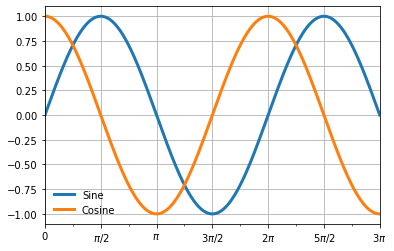

In [29]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)


fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)

ax.plot(x, np.sin(x), lw=3, label="Sine")
ax.plot(x, np.cos(x), lw=3, label="Cosine")

# Set up grid, legend, and limits
ax.grid(True)
ax.set_xlim(0, 3 * np.pi)

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


ax.legend(frameon=False)
plt.show()

### Tick label formatting

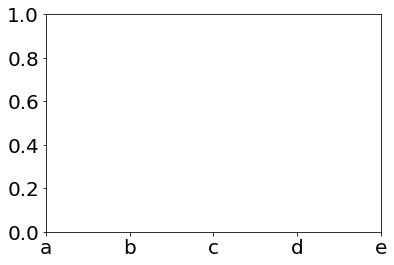

In [30]:
# For both axis at the same time

fig, ax = plt.subplots()
ax.xaxis.set_ticks([0, 1, 2, 3, 4])
ax.xaxis.set_ticklabels(["a", "b", "c", "d", "e"])
ax.tick_params(**{"labelsize": 20})
plt.show()

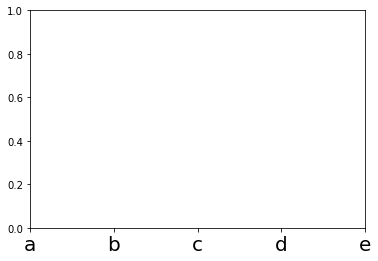

In [31]:
# One axis at a time

fig, ax = plt.subplots()
ax.xaxis.set_ticks([0, 1, 2, 3, 4])
ax.xaxis.set_ticklabels(["a", "b", "c", "d", "e"])
# Either
ax.tick_params(axis="x", **{"labelsize": 20})
# Or
ax.xaxis.set_tick_params(**{"labelsize": 20})
plt.show()

### Scientific formatting

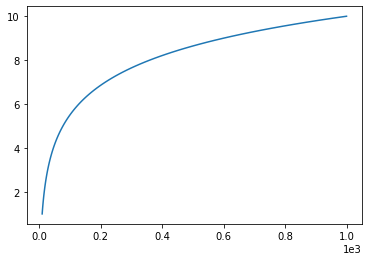

In [32]:
# Logarithmic data range

x = np.logspace(1, 3, 100)
y = np.linspace(1, 10, 100)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.ticklabel_format(axis="x", style="sci", scilimits=(0, 3))  # Limits 10**0, 10**2

## Twinx grids

### Different color per grid

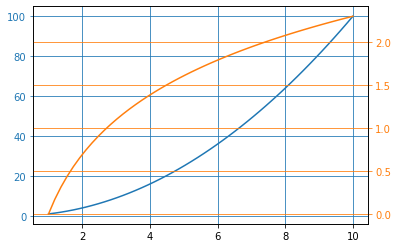

In [33]:
x = np.linspace(1, 10)
y1 = x**2
y2 = np.log(x)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, color="C0")
ax2.plot(x, y2, color="C1")

ax1.grid(color="C0")
ax2.grid(color="C1")
ax1.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

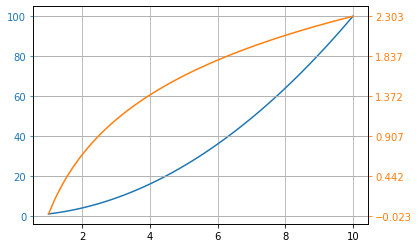

In [34]:
def align_yticks(ax1, ax2):
    l = ax1.get_ylim()
    l2 = ax2.get_ylim()
    f = lambda x: l2[0] + (x - l[0]) / (l[1] - l[0]) * (l2[1] - l2[0])
    ticks = f(ax1.get_yticks())
    ax2.yaxis.set_major_locator(mpl.ticker.FixedLocator(ticks))


x = np.linspace(1, 10)
y1 = x**2
y2 = np.log(x)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, color="C0")
ax2.plot(x, y2, color="C1")

ax1.grid()
ax2.grid()  # Not really necessary in this case, but nicely shows that it works
ax1.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
align_yticks(ax1, ax2)